# Tienda en línea internacional / International Online Store  
Mis predecesores lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas. / My predecessors launched an A/B test and then abandoned it (to start a watermelon farm in Brazil). They only left the technical specifications and test results behind.

**Descripción técnica: / Technical Description:**  
- Nombre de la prueba: recommender_system_test / Test name: `recommender_system_test`  
- Grupos: А (control), B (nuevo embudo de pago) / Groups: A (control), B (new payment funnel)
- Fecha de lanzamiento: 2020-12-07 / Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21 / Date when new users were no longer accepted: 2020-12-21. 
- Fecha de finalización: 2021-01-01 / End date: 2021-01-01  
- Audiencia: 15% de los nuevos usuarios de la región de la UE / Audience: 15% of new users from the EU region  
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado / Test purpose: To assess changes associated with the introduction of an improved recommendation system.
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_cart`) y compras (`purchase`). En cada etapa del embudo `product_page` → `product_cart` → `purchase`, habrá al menos un 10% de aumento. / Expected outcome: Within 14 days of registration, users will demonstrate better conversion rates for product page views (`product_page`), instances of adding items to the shopping cart (`product_cart`), and purchases (`purchase`). At each stage of the funnel (`product_page` → `product_cart` → `purchase`), there should be at least a 10% increase. 
- Número previsto de participantes de la prueba: 6 000 / Estimated number of test participants: 6,000 

**Descirpción de los datos: / Data Description:**  

Estructura ab_project__marketing_events_us.csv: / Structure of `ab_project__marketing_events_us.csv`:
- `name` — el nombre del evento de marketing / marketing event name
- `regions` — regiones donde se llevará a cabo la campaña publicitaria / regions where the advertising campaign will run.
- `start_d` — fecha de inicio de la campaña / campaign start date 
- `finish_dt` — fecha de finalización de la campaña / campaign end date

Estructura final_ab_new_users_upd_us.csv: / Structure of `final_ab_new_users_upd_us.csv`:
- `user_id`
- `first_date` — fecha de inscripción / registration date 
- `region`
- `device` — dispositivo utilizado para la inscripción / device used for registration

Estructura final_ab_events_upd_us.csv: / Structure of `final_ab_events_upd_us.csv`:
- `user_id`
- `event_dt` — fecha y hora del evento / event date and time
- `event_name` — nombre del tipo de evento / type of event 
- `details` — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase) / additional event data (e.g., total order value in USD for `purchase` events).

Estructura final_ab_participants_upd_us.csv: / Structure of `final_ab_participants_upd_us.csv`:
- `user_id`
- `ab_test` — nombre de la prueba / test name 
- `group` — el grupo de prueba al que pertenecía el usuario / test group to which the user belonged

**Partes del proyecto: / Project Components:**  
1. Describir los objetivos del estudio / Define the study objectives
2. Explora los datos / Explore the data
3. Análisis exploratorio de datos / Perform exploratory data analysis
4. Evaluar los resultados de la prueba A/B / Evaluate the A/B test results
5. Conclusiones y resultados / Conclusions and findings

## Objetivos del estudio / Study Objectives  
El objetivo de este estudio es evaluar los resultados de una prueba A/B lanzada para probar un sistema de recomendaciones mejorado en una tienda en línea internacional. La prueba A/B tiene como fin comparar dos grupos de usuarios (grupo A como control y grupo B con el nuevo sistema de recomendaciones) para observar si el sistema mejorado incrementa la conversión de los usuarios en el embudo de compra. / The goal of this study is to evaluate the results of an A/B test conducted to assess the impact of an improved recommendation system in an international online store. The A/B test aims to compare two user groups (Group A as the control and Group B using the new recommendation system) to determine whether the enhanced system increases user conversion within the purchase funnel.  

El análisis se centrará en tres eventos clave dentro del embudo de conversión: / The analysis will focus on three key events in the conversion funnel:  
- `product_page`: Visitas a las páginas de los productos / Visits to product pages
- `product_cart`: Productos agregados al carrito / Products added to the cart
- `purchase`: Compras efectivas / Completed purchases

Se espera que los usuarios en el grupo B (nuevo embudo de pago) muestren un aumento de al menos un 10% en la conversión en cada una de estas etapas, en comparación con el grupo A (control). / It is expected that users in Group B (new payment funnel) will show at least a 10% increase in conversion rates at each stage of the funnel compared to Group A (control).  


## Explorar los datos / Data Exploration

In [1]:
# Importar librerias necesarias
# Import Necessary Libraries  
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
import numpy as np 

In [2]:
# Acceder a los datasets 
# Access the datasets  

calendar = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

### `Calendar`
Calendario de eventos de marketing para 2020 / 2020 Marketing Events Calendar  

In [3]:
# Mostrar los datos
# Show Data  
calendar

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
# Información general 
# General Information  
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
# Cambiar el tipo de datos de `start_dt` y `finish_dt` 
# Change data type of `start_dt` and `finish_dt`  
calendar['start_dt'] = pd.to_datetime(calendar['start_dt'], format = '%Y-%m-%d')
calendar['finish_dt'] = pd.to_datetime(calendar['finish_dt'], format = '%Y-%m-%d')

In [6]:
# Verificar si hay valores ausentes
# Check for missing values  
calendar.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [7]:
# Verificar si hay valores duplicados
# Check for duplicated values
calendar.duplicated().sum()

0

No hay valores ausentes ni duplicados en el dataset `calendar`. / There are no missing or duplicated values in the `calendar` dataset.

### `Users`
Todos los usuarios que se registraron en la tienda en línea  del 7-21 de diciembre de 2020. / All users who registered on the online store from December 7 to December 21, 2020.

In [8]:
# Muestra de los datos 
# Show data
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [9]:
# Información general
# General information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [10]:
# Cambiar el tipo de datos de `first_date` 
# Change the data type of `first_date`
users['first_date'] = pd.to_datetime(users['first_date'], format = '%Y-%m-%d')

In [11]:
# Verificar si hay valores ausentes
# Check for missing values
users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [12]:
# Verificar si hay valores duplicados
# Check for duplicated values
users.duplicated().sum()

0

No hay valores ausentes ni duplicados en el dataset `users`. / There are no missing or duplicated values in the `users` dataset.

### `Events`
Todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021. / All events of new users between December 7, 2020, and January 1, 2021.

In [13]:
# Muestra de los datos / Show data
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [14]:
# Información general / General information
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [15]:
# Cambiar el tipo de datos de `first_date` 
# Change the data type of `first_date`
events['event_dt'] = pd.to_datetime(events['event_dt'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
# Verificar si hay valores ausentes
# Check for missing values
events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [17]:
# Verificar si hay valores duplicados
# Check for duplicated values
events.duplicated().sum()

0

No hay valores duplicados en el dataset `events`. Sin embargo, hay muchos valores ausentes en la columna `details`, esto se debe a que solo los `event_name` = `purchase` tienen datos. / There are no duplicated values in the `events` dataset. However, there are many missing values in the `details` column, as only `event_name` = `purchase` events have data.

### `Participants`
Tabla con los datos de los participantes de la prueba. / Table with the test participants' data.

In [18]:
# Muestra de los datos 
# Show data
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [19]:
# Información general
# General information
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [20]:
# Verificar si hay valores ausentes
# Check for missing values
participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [21]:
# Verificar si hay valores duplicados
# Check for duplicated values
participants.duplicated().sum()

0

No hay valores ausentes ni duplicados en el dataset `participants`. / There are no missing or duplicated values in the `participants` dataset.

## Análisis exploratorio de datos / Exploratory Data Analysis

### Estudiar la conversión en las diferentes etapas del embudo / Study Conversion at Different Funnel Stages

In [23]:
# Combinar participantes y eventos
# Combine participants and events
events_data = events.merge(participants, on = 'user_id')

In [24]:
# Definir las etapas del embudo
# Define the funnel stages
stages = ['product_page', 'product_cart', 'purchase']

# Calcular conversiones por grupo y etapa
# Calculate conversions by group and stage
conversion_rates = {}
for stage in stages:
    stage_info = events_data[events_data['event_name'] == stage]
    stage_users = stage_info.groupby('group')['user_id'].nunique()
    total_users = events_data.groupby('group')['user_id'].nunique()
    conversion_rates[stage] = (stage_users/total_users)*100
    
conversion_rates = pd.DataFrame(conversion_rates).T
conversion_rates

group,A,B
product_page,66.141732,64.238517
product_cart,31.534163,32.828364
purchase,34.061468,32.360999


Solo en el `carrito de compras` la conversión del `grupo B` es mayor y por un porcentaje muy mínimo.  / Only in the `shopping cart` stage is the conversion for `group B` higher, and by a very small percentage.

### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras? / Is the number of events per user evenly distributed between the samples?

In [25]:
# Calcular el número de eventos por usuario en cada grupo
# Calculate the number of events per user in each group
users_event = events_data.groupby(['user_id', 'group'])['event_name'].count().reset_index()
users_event.columns = ['user_id', 'group', 'num_events']
users_event

,user_id,group,num_events
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,12
2,0010A1C096941592,A,12
3,001E72F50D1C48FA,B,6
4,002412F1EB3F6E38,A,6
...,...,...,...
14074,FFE7FC140521F5F6,B,16
14075,FFEFC0E55C1CCD4F,B,4
14076,FFF28D02B1EACBE1,A,9
14077,FFF28D02B1EACBE1,B,9


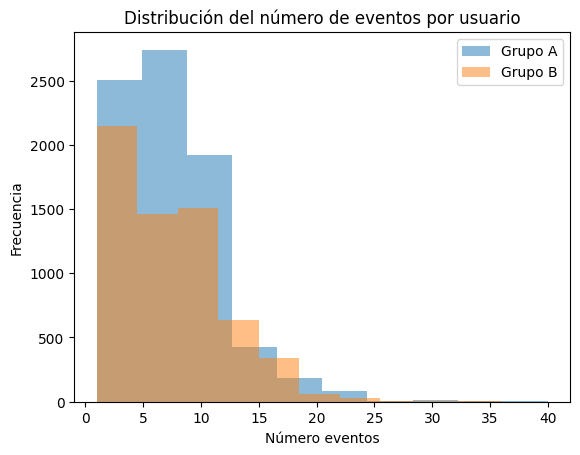

In [26]:
# Separar por grupo
# Separate by group
group_A = users_event[users_event['group'] == 'A']['num_events']
group_B = users_event[users_event['group'] == 'B']['num_events']

# Visualizar la distribución
# Visualize the distribution
plt.hist(group_A, alpha=0.5, label='Grupo A')
plt.hist(group_B, alpha=0.5, label='Grupo B')
plt.title('Distribución del número de eventos por usuario')
plt.xlabel('Número eventos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Ambos grupos parecen tener un comportamiento bastante similar en términos del número de eventos realizados por usuario, especialmente en los rangos bajos. Para confirmar esto, se va a realizar la prueba estadística Mann-Whitney. / Both groups appear to have very similar behavior in terms of the number of events per user, especially in the lower ranges. To confirm this, the Mann-Whitney statistical test will be performed.

In [28]:
# Prueba Mann-Whitney
# Mann-Whitney Test
alpha = 0.05

stat, p_value = st.mannwhitneyu(group_A, group_B)

print('Valor p:', p_value)

if p_value < alpha:
    print("Existen diferencias significativas entre las distribuciones de los dos grupos comparados / There are significant differences between the distributions of the two groups compared.")
else:
    print("No se pueden sacar conclusiones sobre la diferencia / No conclusions can be drawn about the difference.")

Valor p: 1.4211342403215935e-05
Existen diferencias significativas entre las distribuciones de los dos grupos comparados / There are significant differences between the distributions of the two groups compared.


Se puede decir que el número de eventos por usuario está distribuido equitativamente entre las muestras. / It can be said that the number of events per user is evenly distributed between the samples.

### ¿Hay usuarios que están presentes en ambas muestras? / Are there users present in both samples?

In [29]:
# Filtrar usuarios en ambos grupos
# Filter users in both groups
users_group_A = set(users_event[users_event['group'] == 'A']['user_id'])
users_group_B = set(users_event[users_event['group'] == 'B']['user_id'])

# Encontrar usuarios comunes en ambos grupos
# Find common users in both groups
common_users = users_group_A.intersection(users_group_B)
print(f'Número de usuarios presentes en ambas muestras / Number of users present in both samples: {len(common_users)}')

Número de usuarios presentes en ambas muestras / Number of users present in both samples: 441


Hay 441 usuarios en común en los grupos A y B. / There are 441 users in common between groups A and B.

### ¿Cómo se distribuye el número de eventos entre los días? / How is the number of events distributed across the days?

In [30]:
# Extraer solo el día de la fecha del evento
# Extract only the day from the event date
events_data['event_date'] = events_data['event_dt'].dt.date

# Contar lo eventos por día
# Count events by day
events_per_day = events_data.groupby('event_date')['event_name'].count()

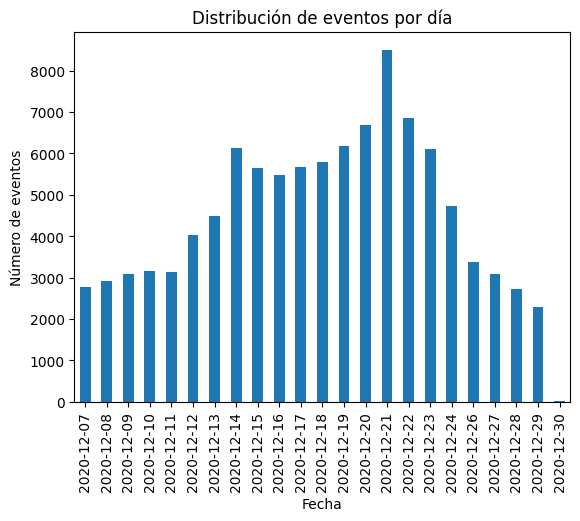

In [31]:
# Graficar la distribución
# Plot the distribution of events by day
events_per_day.plot(kind = 'bar')
plt.title('Distribución de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.show()

Los primeros días de diciembre comienza siento uno distribución uniforme, pero a medida que se acerca la fecha de las festividades incrementa la actividad y después del 24 de diciembre disminuye y a una distribución similar a la de los primeros días. / The first days of December show a nearly uniform distribution, but as the holiday season approaches, activity increases. After December 24th, the activity decreases and returns to a distribution similar to the early days of the month.

### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B? / Are there any peculiarities in the data that need to be considered before starting the A/B test?

In [32]:
# Validar la asignación de grupos
# Validate group assignment
print(participants['group'].value_counts())

A    8214
B    6311
Name: group, dtype: int64


Hay muchos más usuarios en el grupo A que en el grupo B, por estos los usuarios en común se van a dejar solo en el grupo B para intentar equilibrar un poco más la distribución. / There are many more users in group A than in group B, so the common users will only be kept in group B to try to balance the distribution a bit more.

In [33]:
# Asignar usuarios duplicados al grupo B
# Assign duplicate users to group B
events_data.loc[events_data['user_id'].isin(common_users), 'group'] = 'B'

Peculiaridades de los datos a tener en cuenta antes de empezar la prueba A/B / Peculiarities in the data to consider before starting the A/B test:
- Distribución en la asignación de grupos / Distribution in group assignment

## Evaluar los resultados de la prueba A/B / Evaluate A/B Test Results

### ¿Qué se puedes decir sobre los resultados de la prueba A/B? / What can be said about the results of the A/B test?

- Hay días, como el 21 de diciembre que puede generar valores atipicos ya que la actividad por eventos es mucho mayor. Esto puede ser porrque es una epoca cerca a navidad. / There are days, like December 21st, that may generate outlier values as event activity is much higher. This could be because it is close to the Christmas season.

- La catidad de participantes en los grupos debería ser la misma o muy cercana, pero no es el caso. / The number of participants in the groups should be the same or very close, but this is not the case.

- A parte de que los participantes no están distribuidos equitativamente, hay más de 400 usuarios que hacen parte de ambas muestras. / In addition to the participants not being evenly distributed, there are over 400 users who are part of both samples.

- Revisando la conversión, el grupo B no tiene mejores resultados que el grupo A. / Reviewing the conversion, group B does not show better results than group A.

### Utilizar una prueba z para comprobar la diferencia estadística entre las proporciones / Use a z-test to check the statistical difference between proportions

In [34]:
# Nivel de significancia
# Significance level
alpha = 0.5

# Contar conversiones para el grupo A (evento "purchase")
# Count conversions for group A (event "purchase")
conversion_A = events_data[(events_data['event_name'] == 'purchase') & (events_data['group'] == 'A')]['user_id'].nunique()

# Contar conversiones para el grupo B (evento "purchase")
# Count conversions for group B (event "purchase")
conversion_B = events_data[(events_data['event_name'] == 'purchase') & (events_data['group'] == 'B')]['user_id'].nunique()

# Contar total de usuarios en el grupo A
# Count total users in group A
total_A = events_data[events_data['group'] == 'A']['user_id'].nunique()

# Contar total de usuarios en el grupo B
# Count total users in group B
total_B = events_data[events_data['group'] == 'B']['user_id'].nunique()     

print("Total usuarios en grupo A / Total users in group A:", total_A)
print("Total usuarios en grupo B / Total users in group B:", total_B)

Total usuarios en grupo A / Total users in group A: 7433
Total usuarios en grupo B / Total users in group B: 6205


In [35]:
# Calcular la tasa de conversión para el grupo A
# Calculate the conversion rate for group A
conversion_rate_A = (conversion_A/total_A) * 100

# Calcular la tasa de conversión para el grupo B
# Calculate the conversion rate for group B
conversion_rate_B = (conversion_B/total_B) * 100

print(f'Tasa de conversión para el grupo A / Conversion rate for group A: {conversion_rate_A}')
print(f'Tasa de conversión para el grupo B / Conversion rate for group B: {conversion_rate_B}')

Tasa de conversión para el grupo A / Conversion rate for group A: 34.373738732678596
Tasa de conversión para el grupo B / Conversion rate for group B: 32.36099919419823


In [36]:
# Proporción combinada
# Proporción combinada
conversion_combined = (conversion_A + conversion_B) / (total_A + total_B)

# Diferencia entre las proporciones
# Difference between proportions
difference = conversion_rate_A - conversion_rate_B

# Estadístico Z
# Z statistic
z_value = difference / mth.sqrt(conversion_combined * (1 - conversion_combined) * (1 / total_A + 1 / total_B))

# Establecer la distribución normal estándar (media 0, desviación estándar 1)
# Set the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0,1)

# Valor p de la prueba Z 
# p-value of the Z test
p_value = (1 - distr.cdf(abs(z_value))) * 2 

print('p-value:', p_value)

if (p_value < alpha):
    print('Hay una diferencia significativa entre las proporciones / There is a significant difference between the proportions.')
    
else:
    print('No hay razón para pensar que las proporciones son diferentes / There is no reason to believe that the proportions are different.')

p-value: 0.0
Hay una diferencia significativa entre las proporciones / There is a significant difference between the proportions.


## Conclusiones y resultados / Conclusions and Results

Podrian generar sesgos / Potential biases could include:
- Las compras en el mes de diciembre, especialmete los dís cerca a las fiestas / Purchases in December, especially the days near the holidays.
- No tener la misma cantidad de participantes en ambas muestras / Unequal number of participants in both samples.
- Tener usuarios que hacen parte de ambos grupos / Having users that are part of both groups.
- En la mayoría de etapas, el grupo A tiene mejor conversión que el grupo B / In most stages, group A has better conversion than group B.

Puede ser necesario realizar ajustes en el sistema antes de continuar con la implementación / It may be necessary to make adjustments to the system before proceeding with the implementation.